# Proyecto 1 - Security Data Science

In [1]:
import numpy as np
import pandas as pd
import openpyxl
from pandas_profiling import ProfileReport

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

In [2]:
df1 = pd.read_csv("dataset-part1.csv")
df2 = pd.read_csv("dataset-part2.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570666 entries, 0 to 3570665
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  L4

In [4]:
df1.head()

BIFLOW_DIRECTION  DIRECTION DST_TO_SRC_SECOND_BYTES  FIREWALL_EVENT  \
0                 1          0                      40               0   
1                 1          0                       ,               0   
2                 1          0                     104               0   
3                 1          0                       ,               0   
4                 1          0                      40               0   

   FIRST_SWITCHED  FLOW_ACTIVE_TIMEOUT  FLOW_DURATION_MICROSECONDS  \
0      1616660040                  120                         339   
1      1616660040                  120                           0   
2      1616660040                  120                       44725   
3      1616660040                  120                           0   
4      1616660040                  120                        1114   

   FLOW_DURATION_MILLISECONDS  FLOW_END_MILLISECONDS  FLOW_END_SEC  ...  \
0                           0          1616660040010    1616660040  ...   
1                           0          1616660040068    1616660040  ...   
2                          44          1616660040114    1616660040  ...   
3                           0          1616660040122    1616660040  ...   
4                           1          1616660040184    1616660040  ...   

   TCP_WIN_MSS_IN  TCP_WIN_MSS_OUT  TCP_WIN_SCALE_IN  TCP_WIN_SCALE_OUT  \
0            1460                0                 0                  0   
1               0                0                 0                  0   
2               0                0                 0                  0   
3            1440                0                 8                  0   
4               0                0                 0                  0   

   SRC_TOS  DST_TOS  L7_PROTO_NAME SAMPLING_INTERVAL TOTAL_FLOWS_EXP  \
0        0        0        Unknown                 1         2293398   
1       40        0           ICMP                 1         2293400   
2        0        0            TLS                 1         2293404   
3       40        0        Unknown                 1         2293407   
4        0        0            TLS                 1         2293409   

         LABEL  
0  Normal flow  
1  Normal flow  
2  Normal flow  
3  Normal flow  
4  Normal flow  

[5 rows x 50 columns]

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8637207 entries, 0 to 8637206
Data columns (total 50 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   BIFLOW_DIRECTION            int64 
 1   DIRECTION                   int64 
 2   DST_TO_SRC_SECOND_BYTES     object
 3   FIREWALL_EVENT              int64 
 4   FIRST_SWITCHED              int64 
 5   FLOW_ACTIVE_TIMEOUT         int64 
 6   FLOW_DURATION_MICROSECONDS  int64 
 7   FLOW_DURATION_MILLISECONDS  int64 
 8   FLOW_END_MILLISECONDS       int64 
 9   FLOW_END_SEC                int64 
 10  FLOW_ID                     int64 
 11  FLOW_INACTIVE_TIMEOUT       int64 
 12  FLOW_START_MILLISECONDS     int64 
 13  FLOW_START_SEC              int64 
 14  FRAME_LENGTH                int64 
 15  IN_BYTES                    int64 
 16  IN_PKTS                     int64 
 17  IPV4_DST_ADDR               object
 18  IPV4_SRC_ADDR               object
 19  L4_DST_PORT                 int64 
 20  L4

In [6]:
df2.head()

BIFLOW_DIRECTION  DIRECTION  \
0                 1          0   
1                 1          0   
2                 1          0   
3                 1          0   
4                 1          0   

                             DST_TO_SRC_SECOND_BYTES  FIREWALL_EVENT  \
0  ,,48,,,,,,,,,,40,,,,,,,,,,40,,,,,,,,,,40,,,,,,...               0   
1                                        ,,,,,,,,,,,               0   
2                                        ,,,,,,,,,,,               0   
3                                                  ,               0   
4                                                  ,               0   

   FIRST_SWITCHED  FLOW_ACTIVE_TIMEOUT  FLOW_DURATION_MICROSECONDS  \
0      1618174987                  120                   104116914   
1      1618175067                  120                     9529030   
2      1618175067                  120                     9529169   
3      1618175077                  120                           0   
4      1618175077                  120                           0   

   FLOW_DURATION_MILLISECONDS  FLOW_END_MILLISECONDS  FLOW_END_SEC  ...  \
0                      104116          1618175092090    1618175092  ...   
1                        9529          1618175077010    1618175077  ...   
2                        9529          1618175077010    1618175077  ...   
3                           0          1618175077021    1618175077  ...   
4                           0          1618175077069    1618175077  ...   

   TCP_WIN_MSS_IN  TCP_WIN_MSS_OUT  TCP_WIN_SCALE_IN  TCP_WIN_SCALE_OUT  \
0            1460             1460                 0                  0   
1               0                0                 0                  0   
2               0                0                 0                  0   
3               0                0                 0                  0   
4               0                0                 0                  0   

   SRC_TOS  DST_TOS   L7_PROTO_NAME SAMPLING_INTERVAL TOTAL_FLOWS_EXP  \
0        0      164             TLS                 1        77251491   
1        0        0  STUN.Messenger                 1        77251492   
2      192        0            ICMP                 1        77251493   
3       72        0            ICMP                 1        77251494   
4        0        0         Unknown                 1        77251495   

         LABEL  
0  Normal flow  
1  Normal flow  
2  Normal flow  
3  Normal flow  
4  Normal flow  

[5 rows x 50 columns]

## Gráficos exploratorios

Feature Importance in the prediction of LABEL


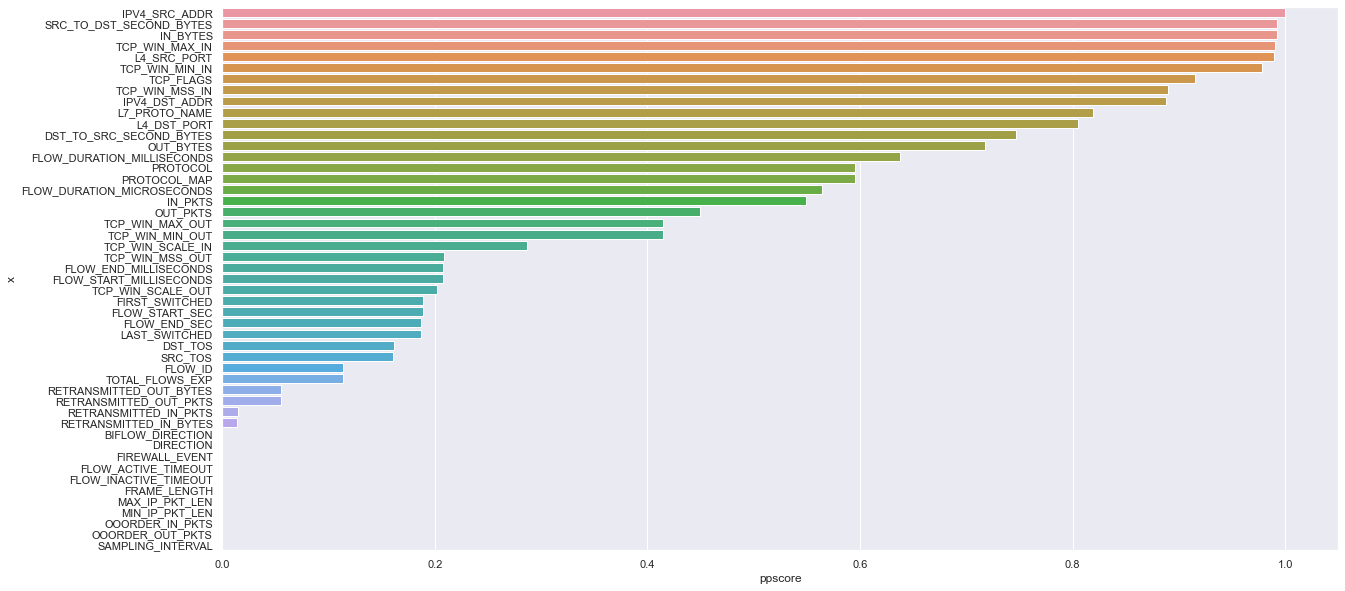

In [3]:
eda_numcat(df1, "LABEL", method = "pps") 

#### Datos numéricos

Outlier Analysis - Boxplot


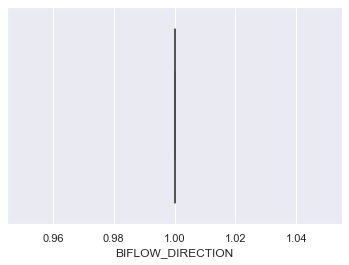

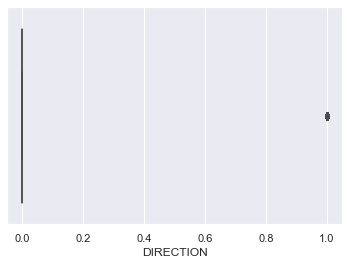

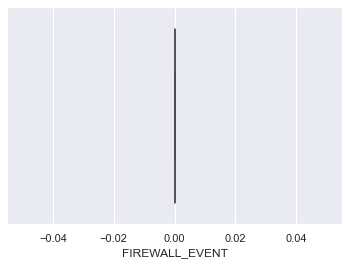

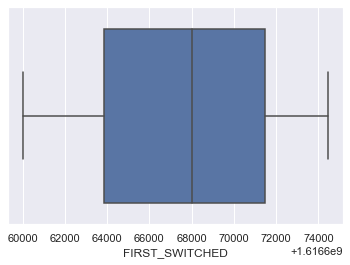

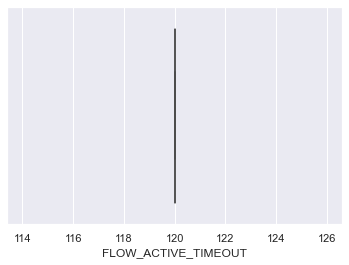

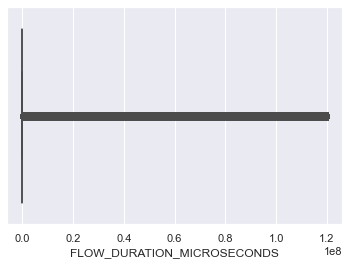

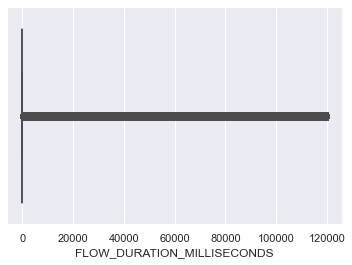

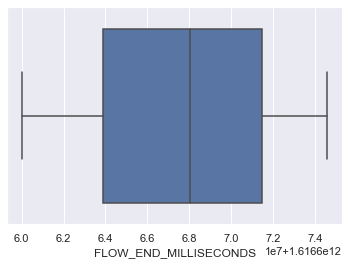

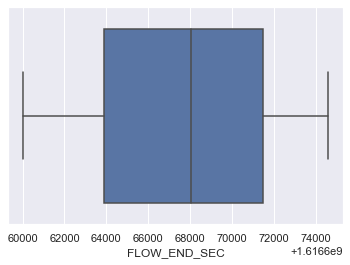

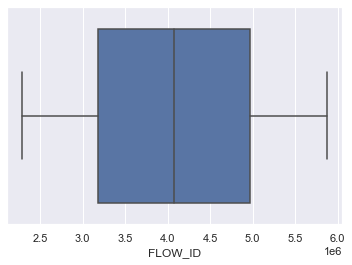

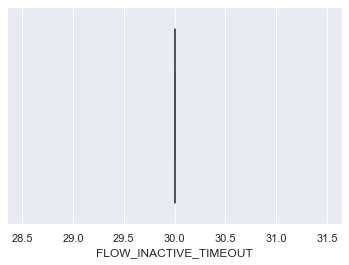

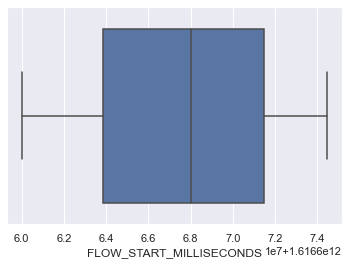

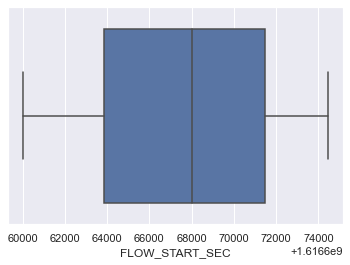

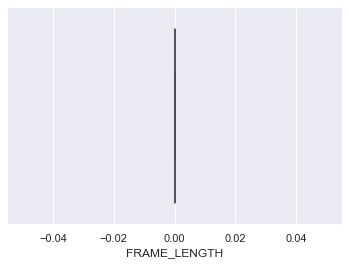

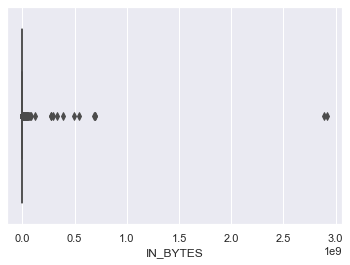

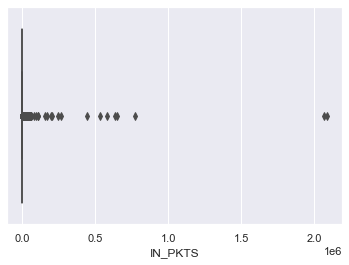

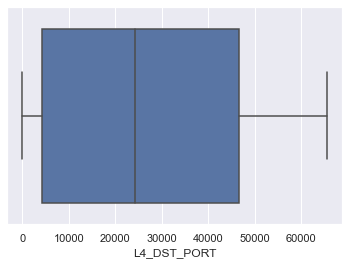

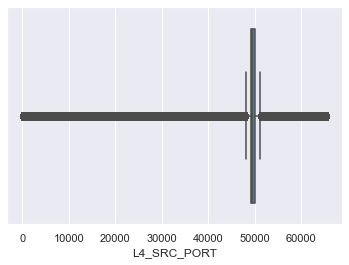

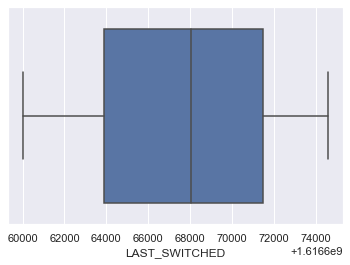

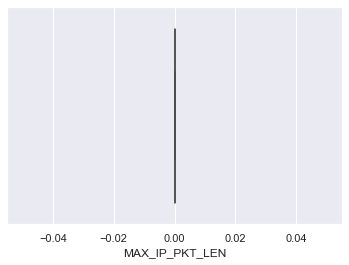

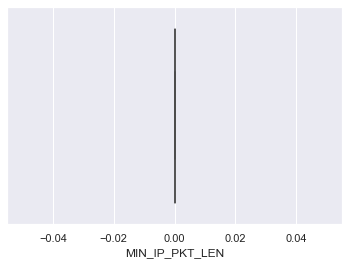

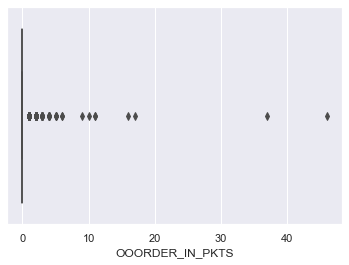

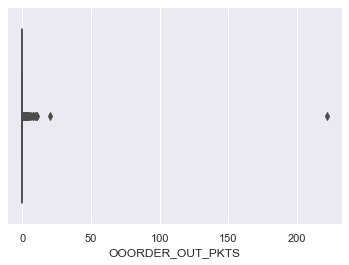

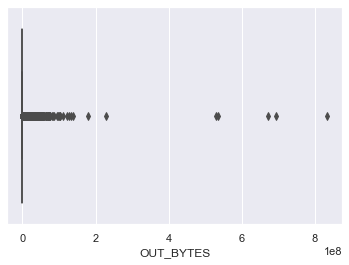

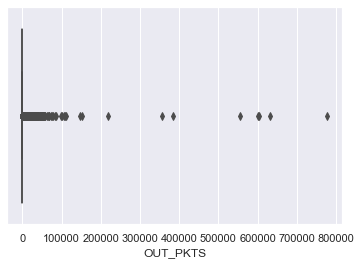

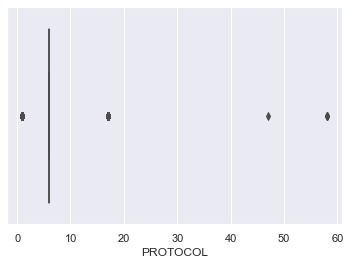

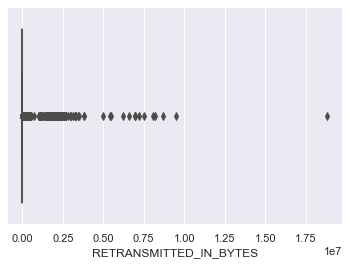

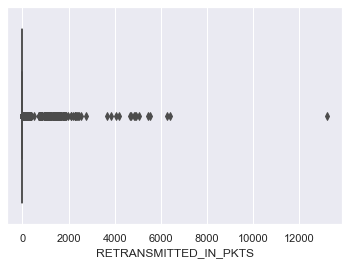

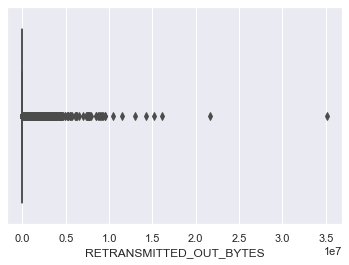

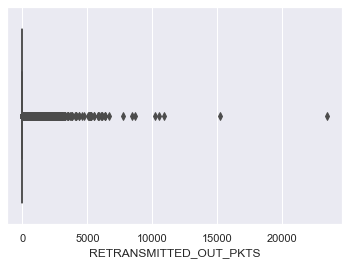

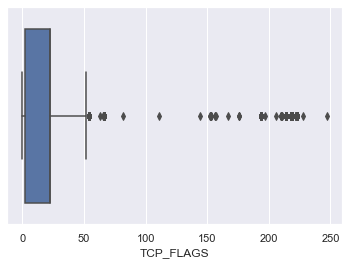

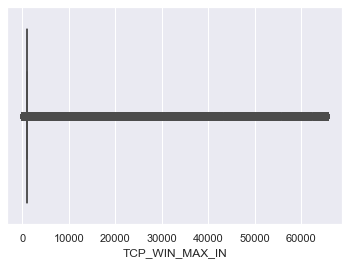

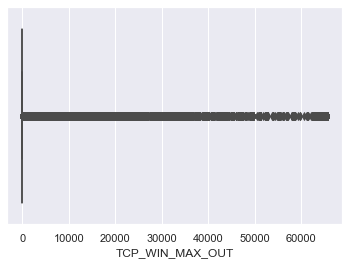

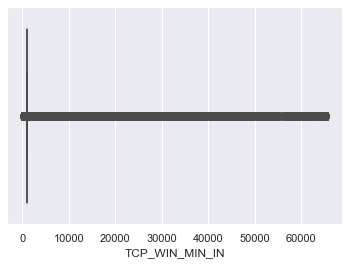

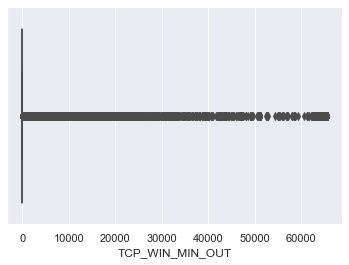

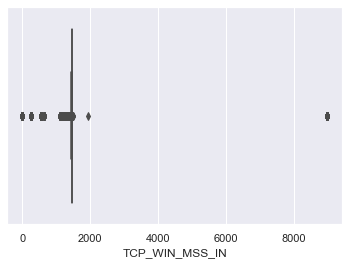

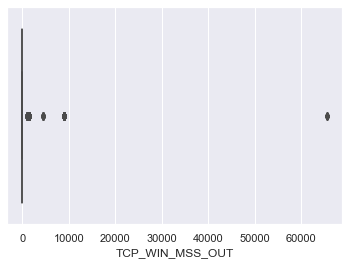

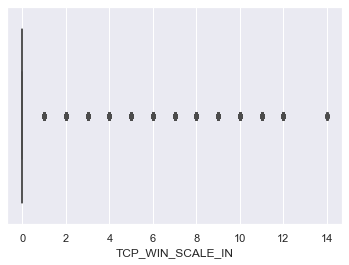

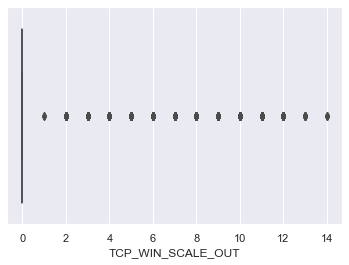

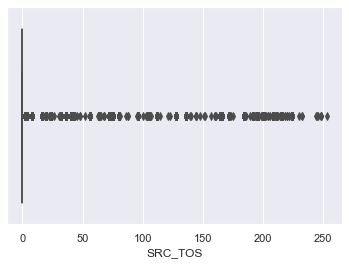

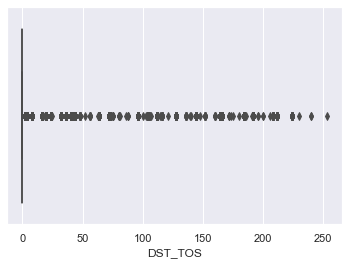

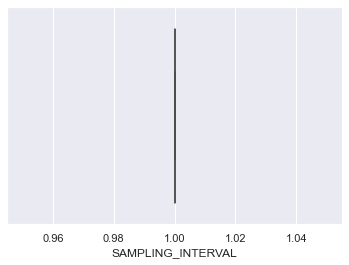

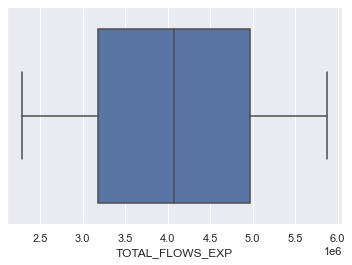

Distribution Analysis - Histogram


c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



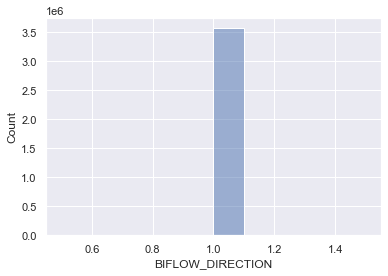

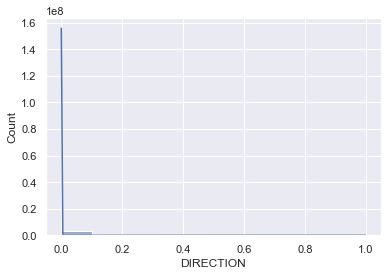

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



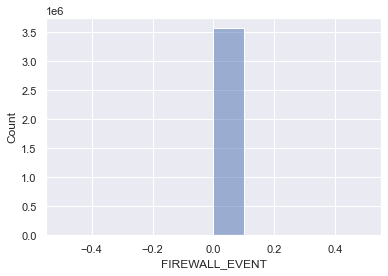

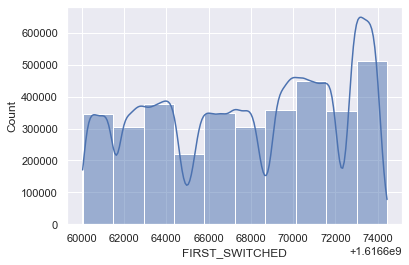

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



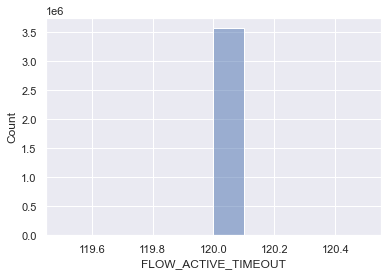

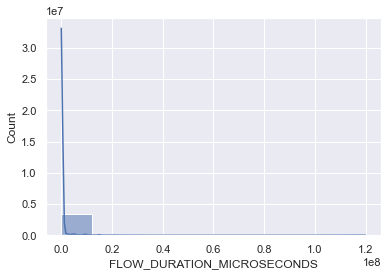

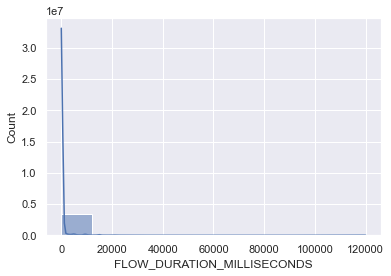

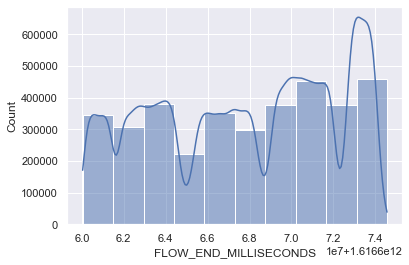

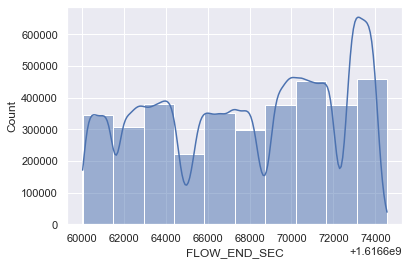

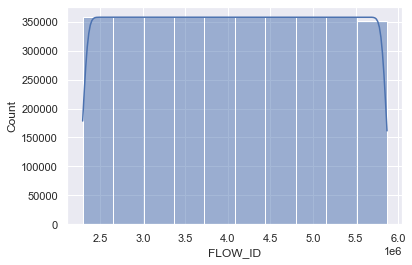

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



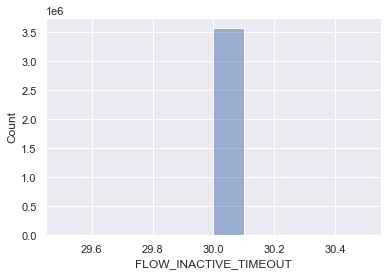

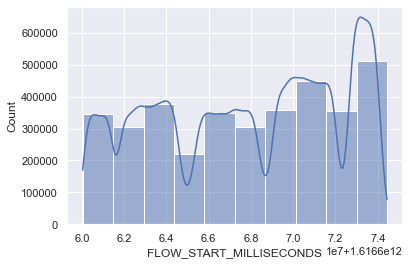

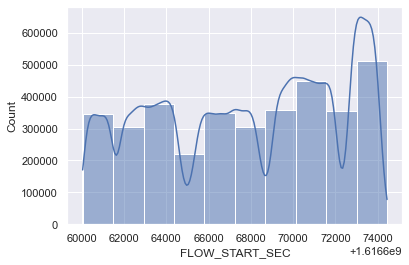

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



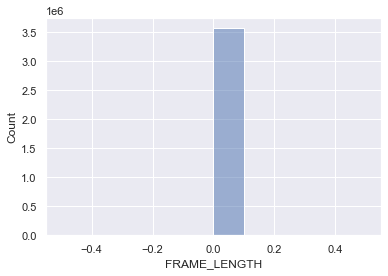

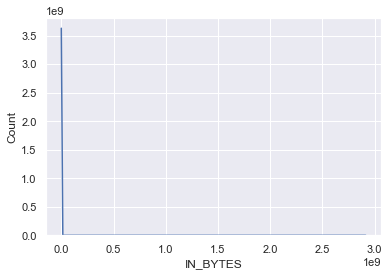

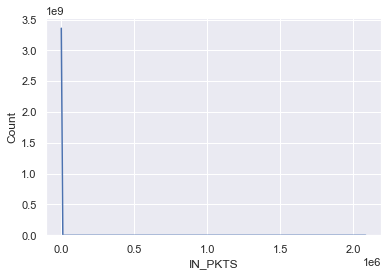

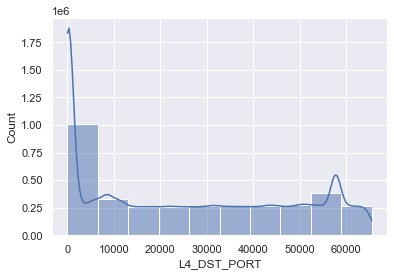

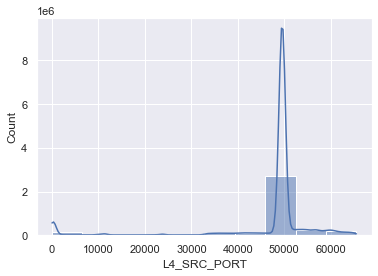

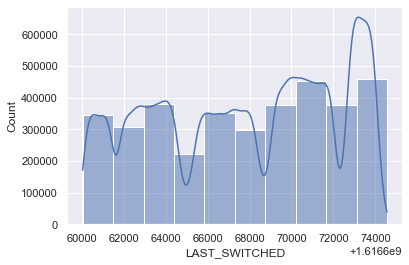

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



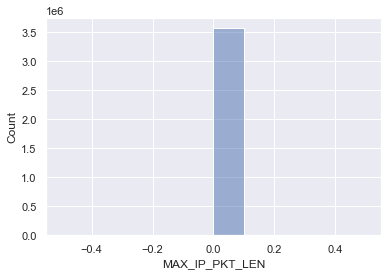

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



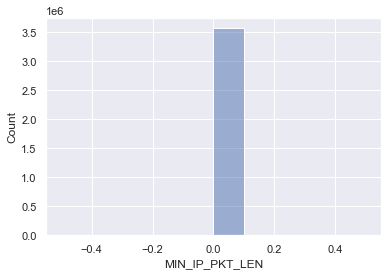

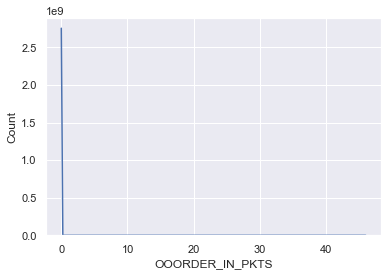

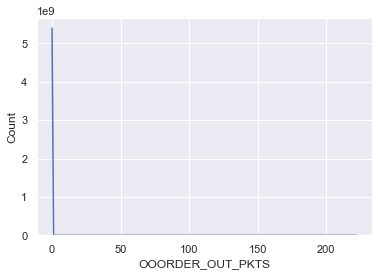

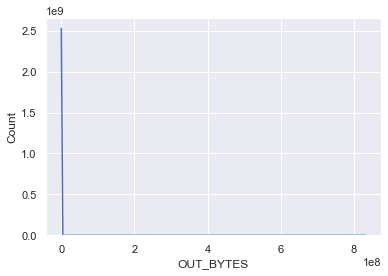

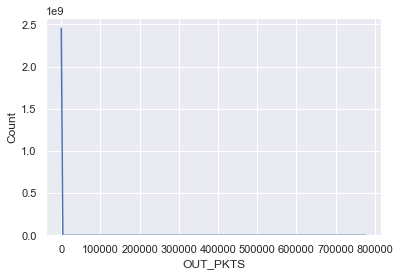

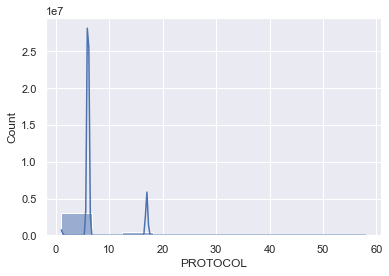

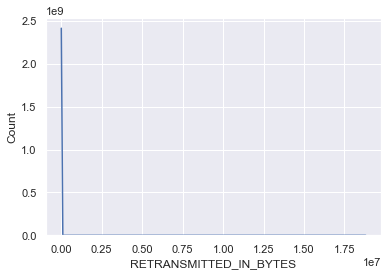

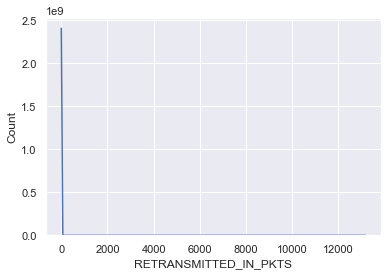

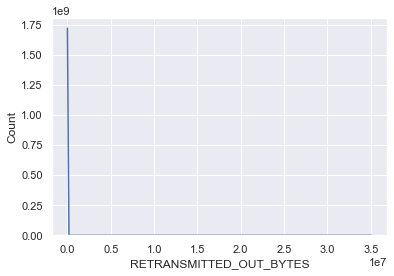

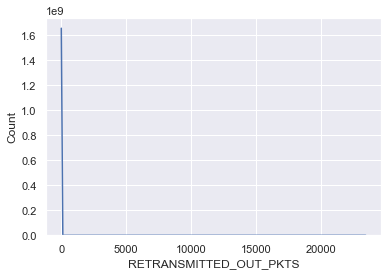

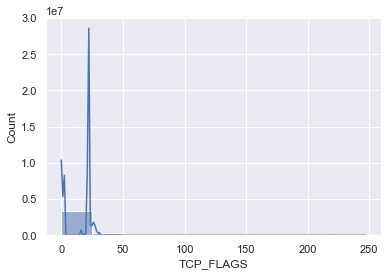

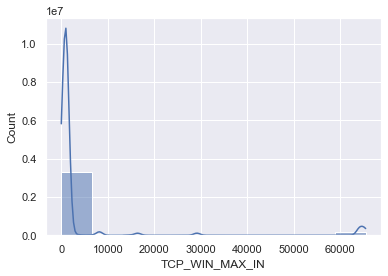

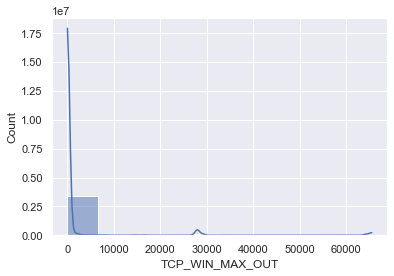

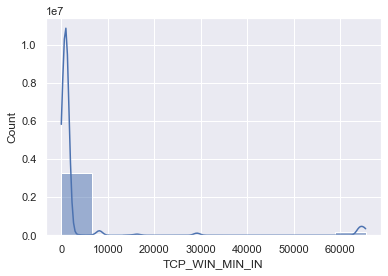

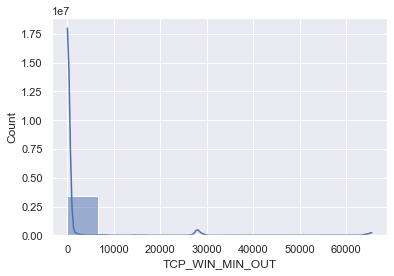

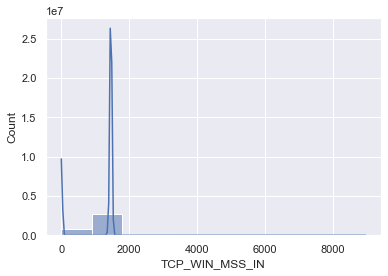

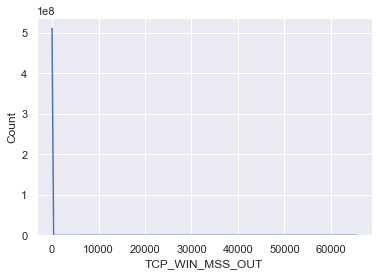

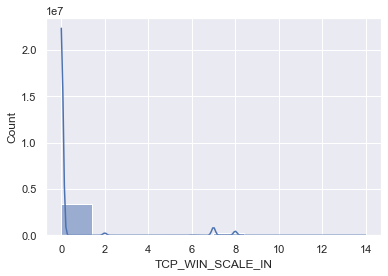

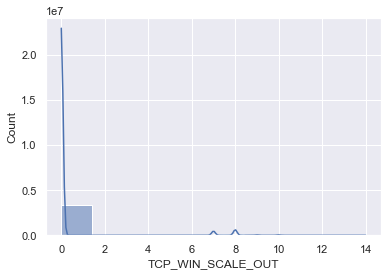

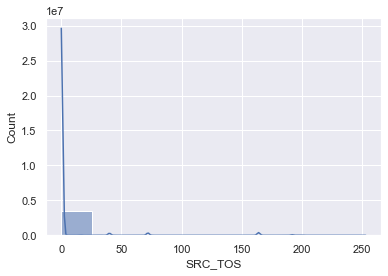

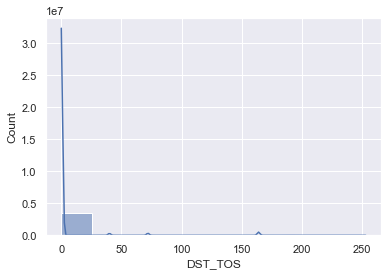

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



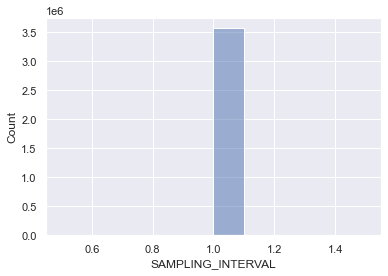

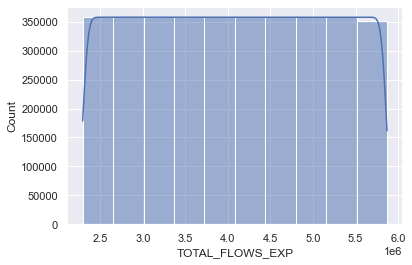

In [7]:
eda_num(df1)

Outlier Analysis - Boxplot


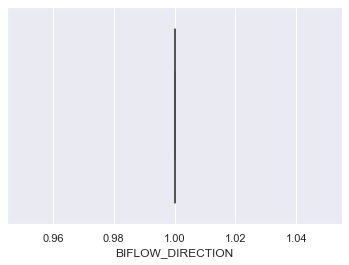

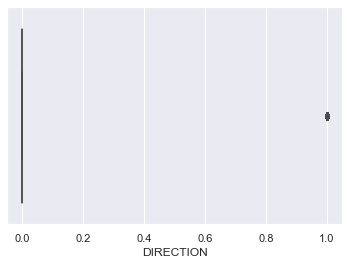

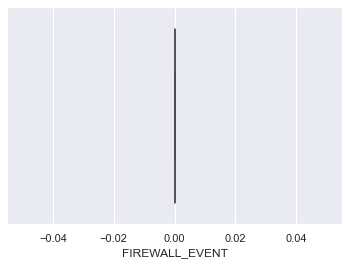

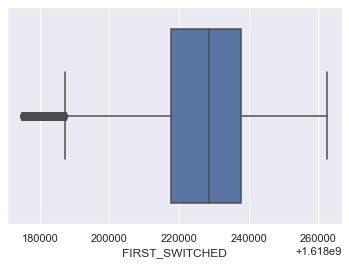

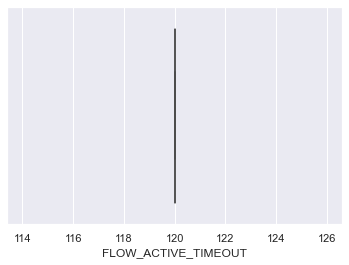

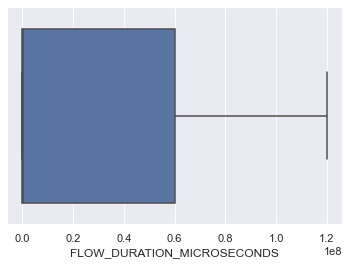

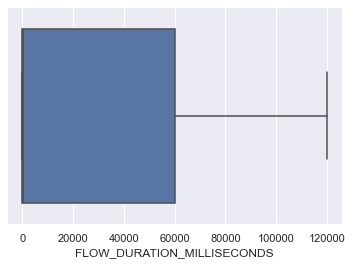

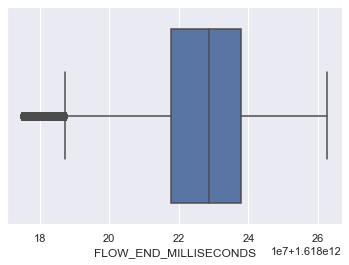

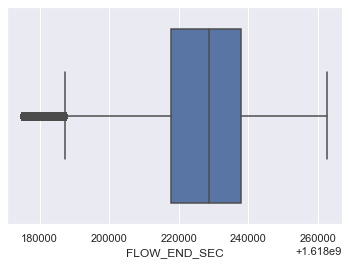

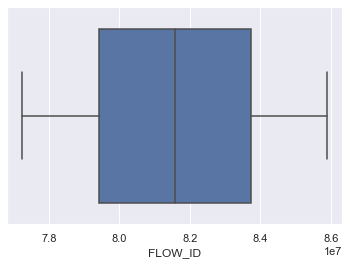

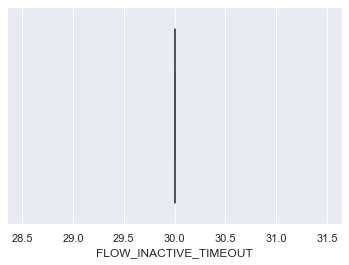

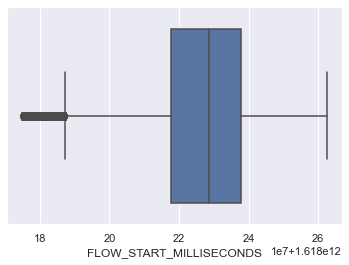

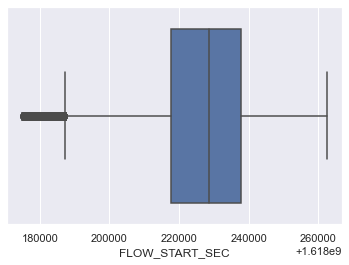

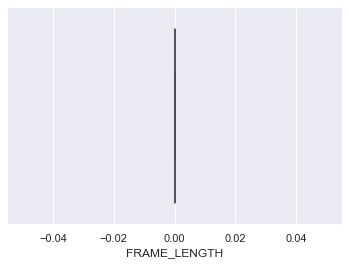

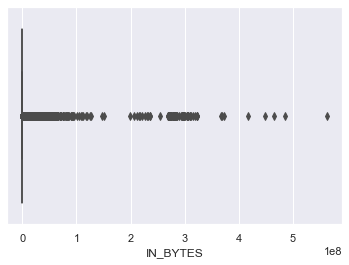

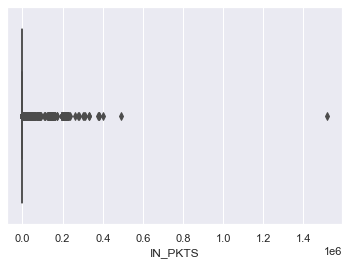

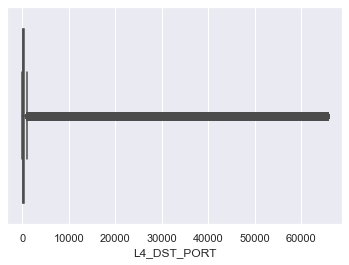

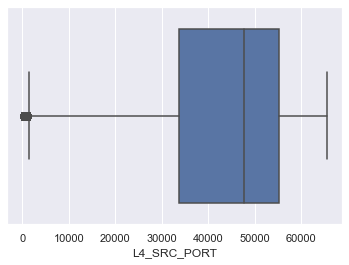

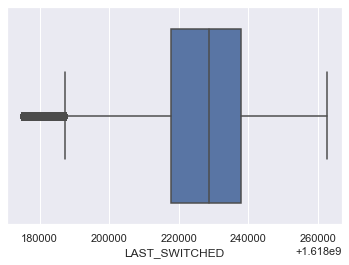

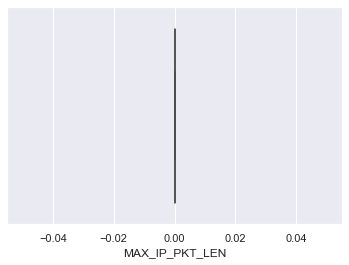

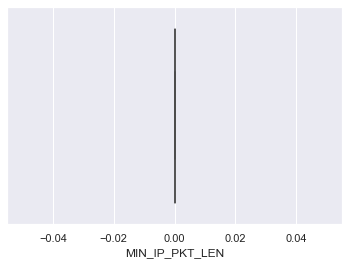

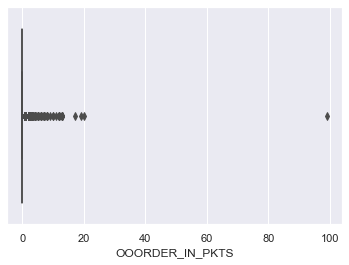

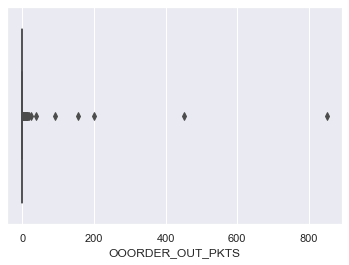

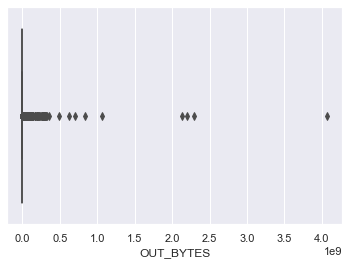

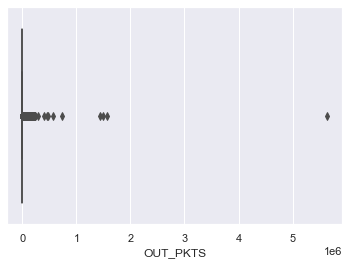

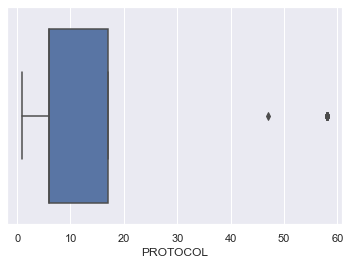

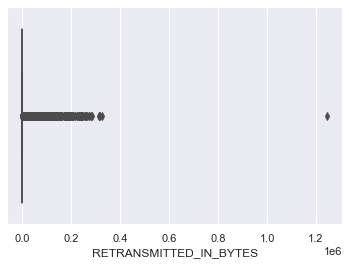

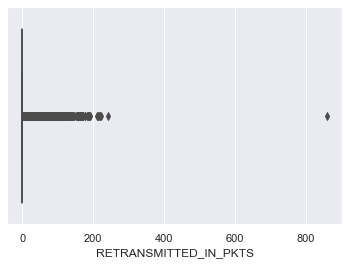

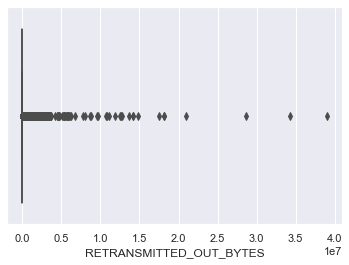

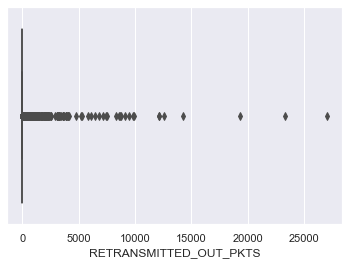

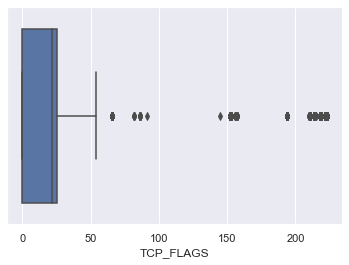

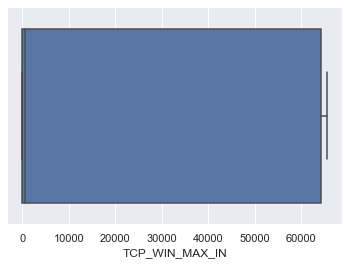

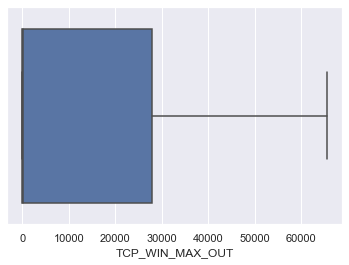

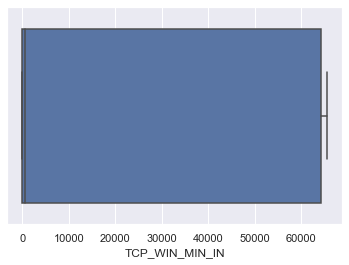

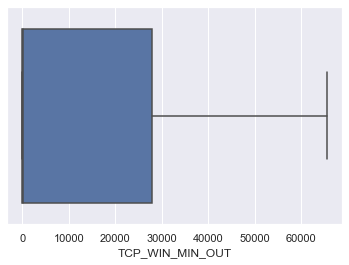

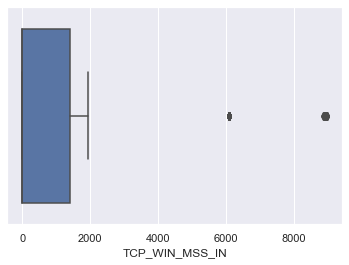

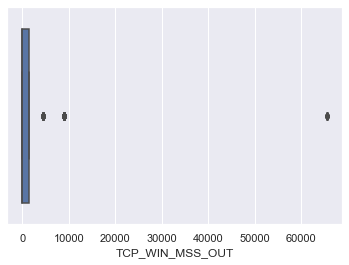

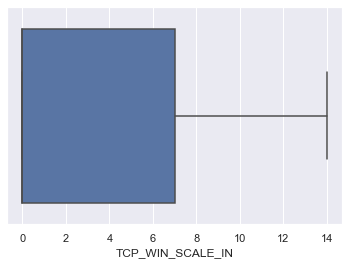

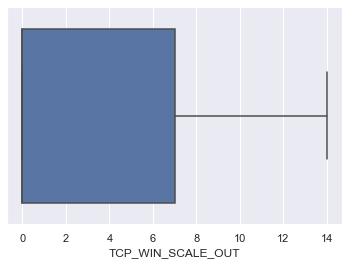

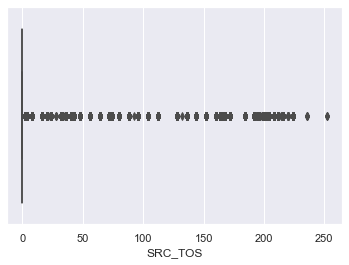

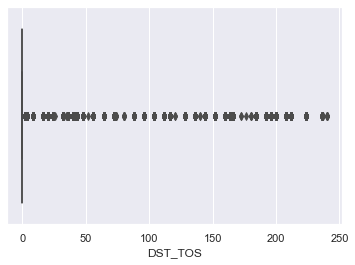

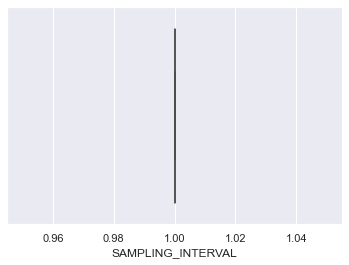

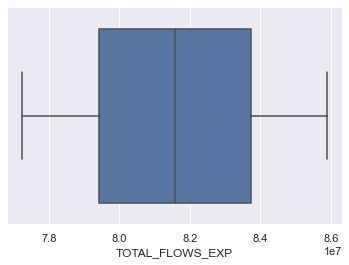

Distribution Analysis - Histogram


c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



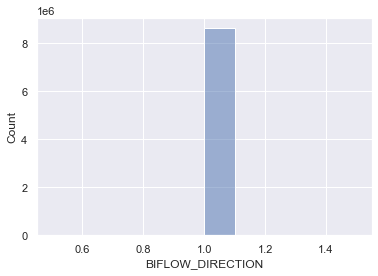

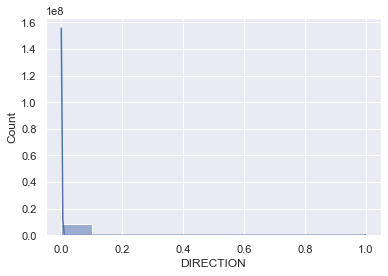

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



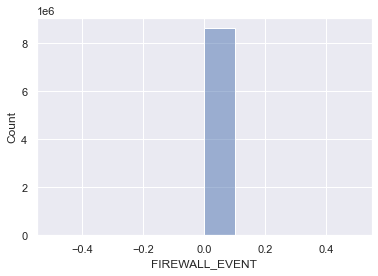

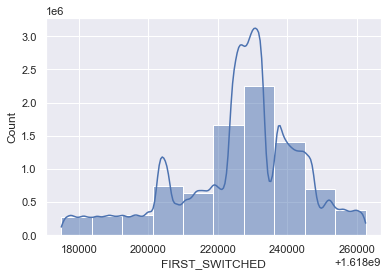

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



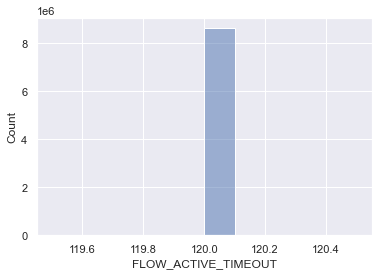

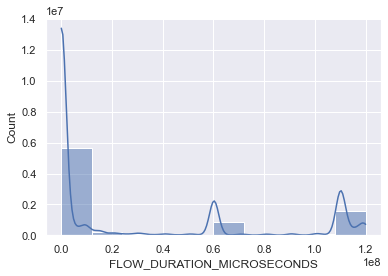

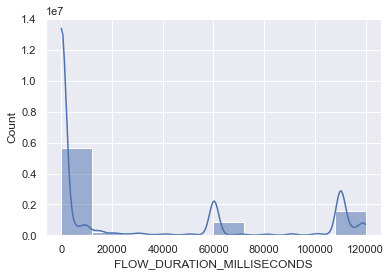

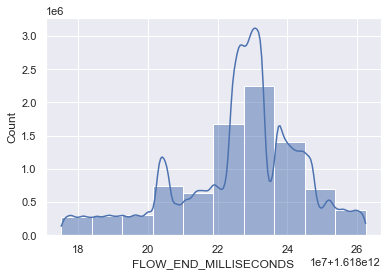

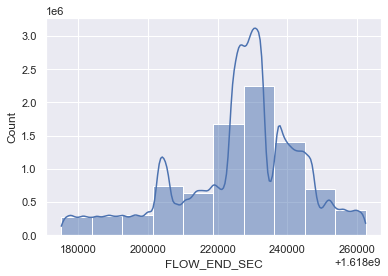

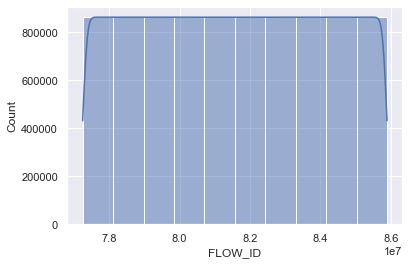

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



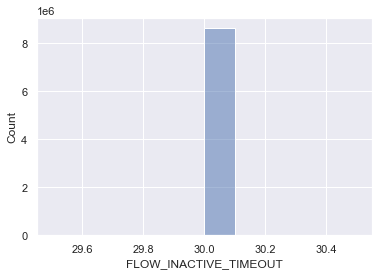

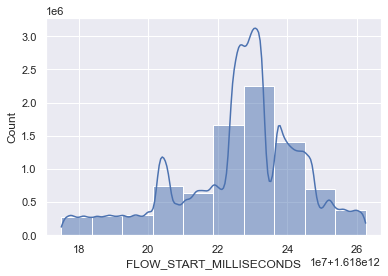

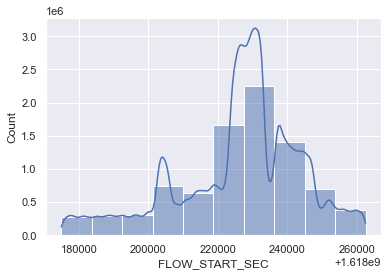

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



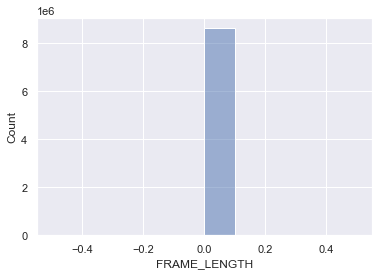

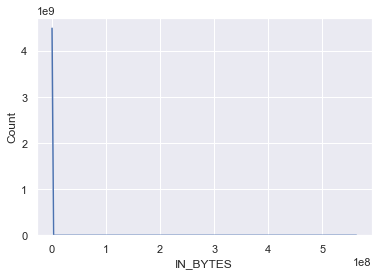

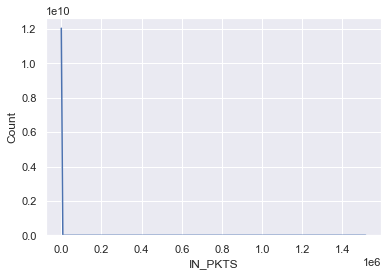

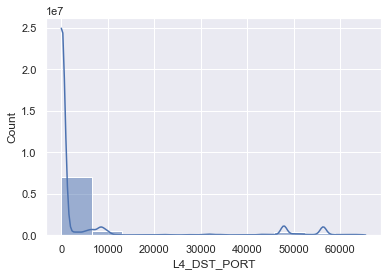

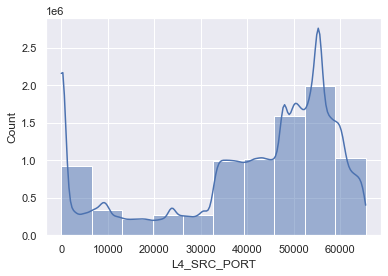

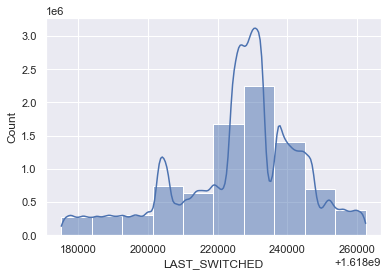

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



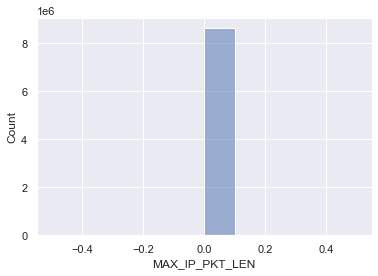

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



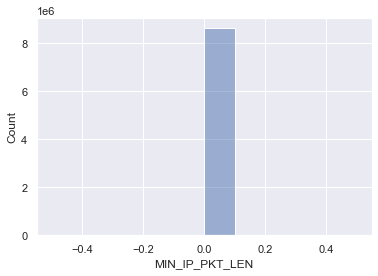

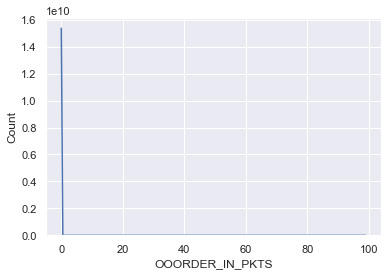

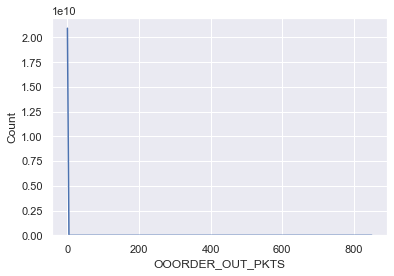

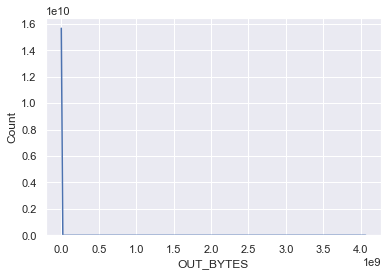

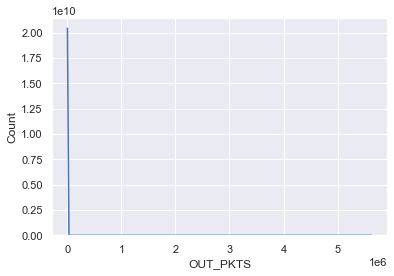

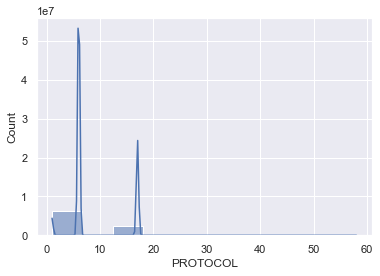

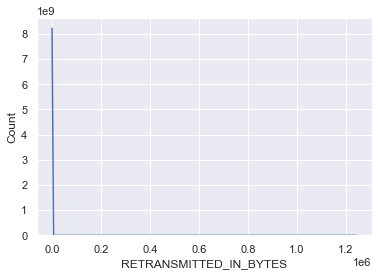

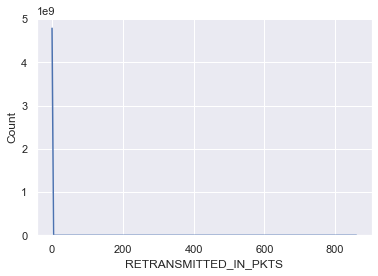

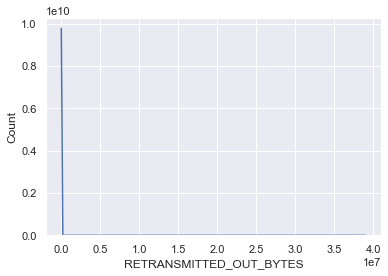

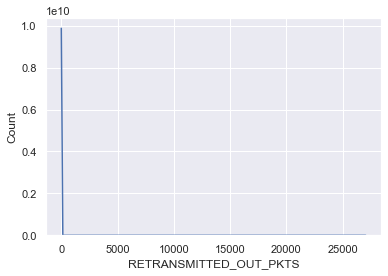

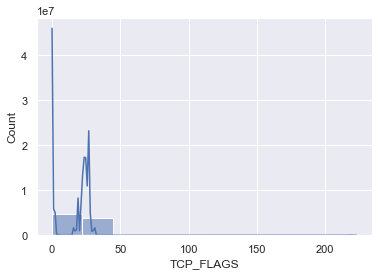

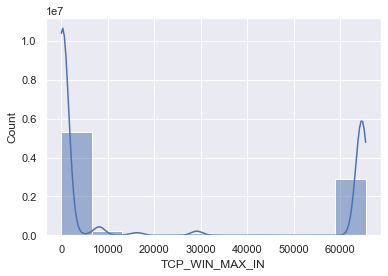

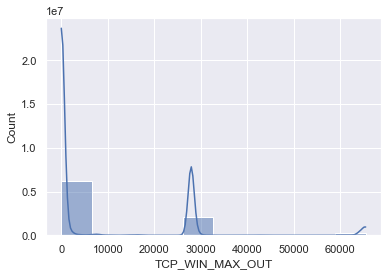

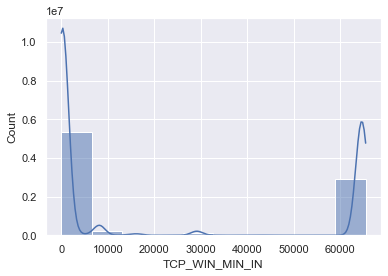

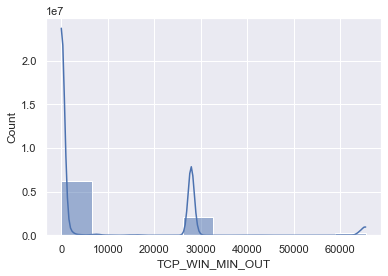

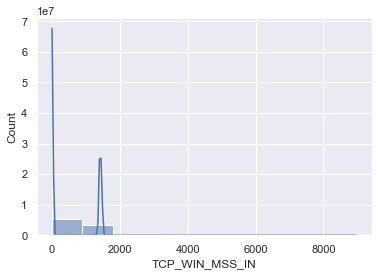

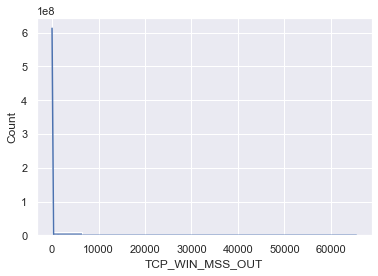

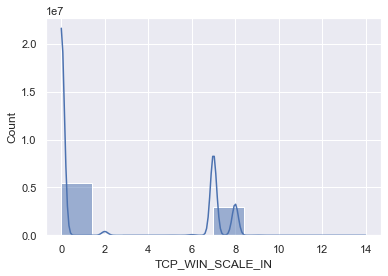

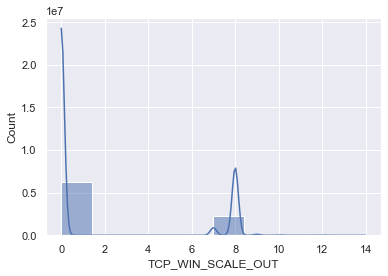

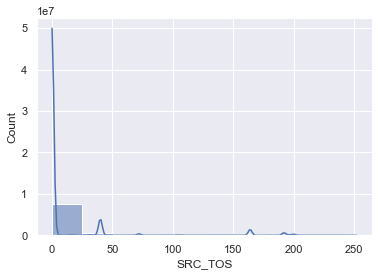

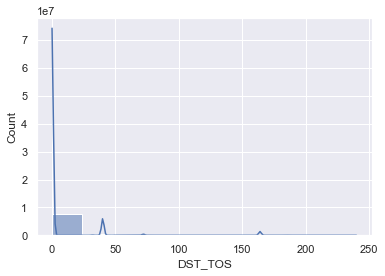

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



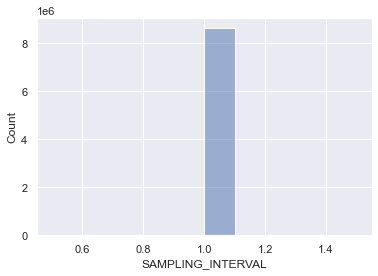

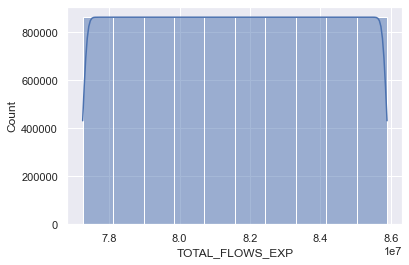

In [8]:
eda_num(df2)

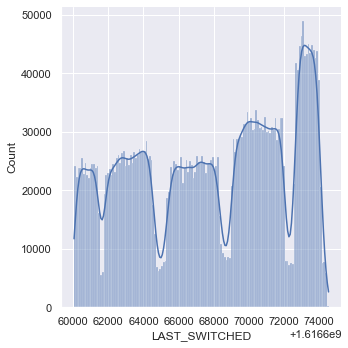

In [9]:
sns.displot(df1['LAST_SWITCHED'], kde = True);

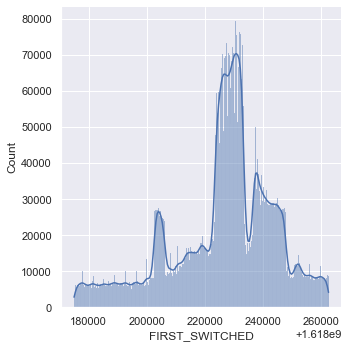

In [10]:
sns.displot(df2['FIRST_SWITCHED'], kde = True);

#### Datos categóricos

Bar Plot of LABEL


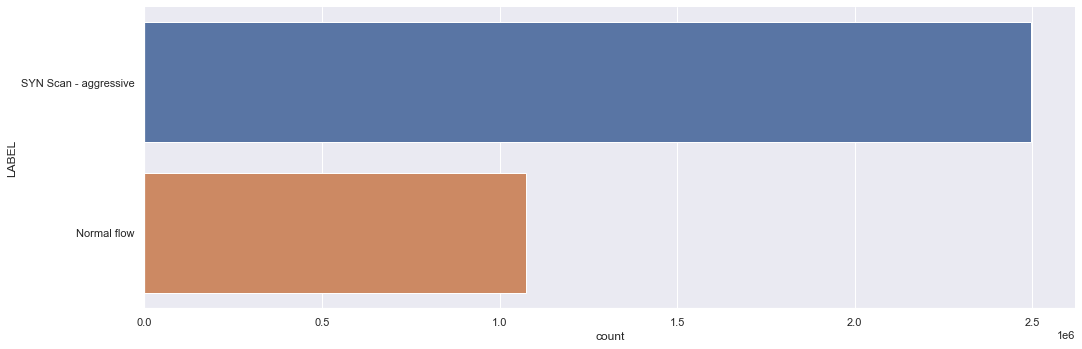

Summary of LABEL


count  relative_pct
SYN Scan - aggressive  2496814           0.7
Normal flow            1073852           0.3

In [11]:
eda_cat(df1, x = "LABEL")

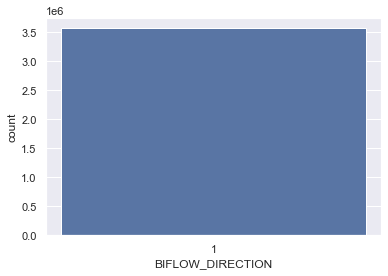

In [3]:
sns.countplot(x = 'BIFLOW_DIRECTION', data = df1);

In [4]:
df1['DIRECTION'].value_counts() 

0    3569421
1       1245
Name: DIRECTION, dtype: int64

## Matriz de correlacion

In [3]:
eda_num(df1, method='correlation')

Correlation Analysis - Heatmap


c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



In [4]:
eda_num(df2, method='correlation')

Correlation Analysis - Heatmap


## Reporte Final

In [3]:
profile = ProfileReport(df1, minimal=True, title='Reporte Explorativo - parte 1')
profile.to_file('ReporteExplorativo_parte 1.html')

Summarize dataset:   0%|          | 0/58 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile = ProfileReport(df2, minimal=True, title='Reporte Explorativo - parte 2')
profile.to_file('ReporteExplorativo_parte 2.html')

Summarize dataset:   0%|          | 0/58 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]